<a href="https://colab.research.google.com/github/shinnew9/Apziva_practice_code/blob/main/Project4-MonReader/TextExtraction_OCRmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image

image_path = Image.open("/content/drive/MyDrive/Apziva/4th_MonReader/monreader_images/images/testing/notflip/0001_000000002.jpg").convert("RGB")

## Package Installation

In [ ]:
!pip install -q transformers accelerate gtts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 727.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.4 MB/s eta 0:00:00


## TrOCR

In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import torch

model_id = "microsoft/trocr-base-stage1"
processor = TrOCRProcessor.from_pretrained(model_id)
model = VisionEncoderDecoderModel.from_pretrained(model_id).to("cuda" if torch.cuda.is_available() else "cpu")


pixel_values = processor(images=image_path, return_tensors="pt").pixel_values.to(model.device)
generated_ids = model.generate(pixel_values)
result = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

print("🧠 TrOCR Output:\n", result)

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-stage1 and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


🧠 TrOCR Output:
 AMERICA


### Testing TrOCR-Korean

#### Downloding the KorOCR dataset

In [ ]:
!git lfs install

Git LFS initialized.


In [ ]:
!git clone https://huggingface.co/datasets/developer0hye/korocr

Cloning into 'korocr'...
remote: Enumerating objects: 240, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (235/235), done.
remote: Total 240 (delta 51), reused 0 (delta 0), pack-reused 4 (from 1)
Receiving objects: 100% (240/240), 64.93 KiB | 4.64 MiB/s, done.
Resolving deltas: 100% (51/51), done.
Filtering content: 100% (3/3), 655.55 MiB | 18.83 MiB/s, done.


In [ ]:
!mv /content/korocr /content/drive/MyDrive/Apziva/4th_MonReader/

#### KorOCR Dataset Testing for sample

In [ ]:
import pandas as pd
from IPython.display import display
from IPython import get_ipython


train_parquet_file = "/content/drive/MyDrive/Apziva/4th_MonReader/korocr/data/train-00000-of-00002.parquet"
df_train_parquet = pd.read_parquet(train_parquet_file)


print(df_train_parquet.shape)
display(df_train_parquet.head(5))


# display(train_parquet_file.info(verbose=True, memory_usage='deep'))
# display(df_train_parquet.memory_usage(deep=True))

(486, 3)


,image,query,label
0,{'bytes': b'\xff\xd8\xff\xe1\x05lExif\x00\x00M...,"이미지의 모든 문자를 인식하세요. 반환 포맷: [""문자 1"", ""문자 2"", ......","[""온"", ""가족이"", ""함께"", ""즐기는"", ""어린이"", ""서커스"", ""마술쇼"",..."
1,{'bytes': b'\xff\xd8\xff\xe1\x05$Exif\x00\x00M...,"이미지의 모든 문자를 인식하세요. 반환 포맷: [""문자 1"", ""문자 2"", ......","[""한국폴리텍대학"", ""인천캠퍼스"", ""3·4학년,"", ""야간"", ""2025학년도""..."
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"이미지의 모든 문자를 인식하세요. 반환 포맷: [""문자 1"", ""문자 2"", ......","[""고향"", ""방문을"", ""환영합니다."", ""풍성하고"", ""넉넉한"", ""한가위"", ..."
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"이미지의 모든 문자를 인식하세요. 반환 포맷: [""문자 1"", ""문자 2"", ......","[""월은"", ""정기분"", ""재산세"", ""(토지,"", ""주택1/2)"", ""납부의"", ..."
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"이미지의 모든 문자를 인식하세요. 반환 포맷: [""문자 1"", ""문자 2"", ......","[""전세사기피해자지원법,"" ""간호법"", ""등"", ""28개"", ""민생법안"", ""국회""..."


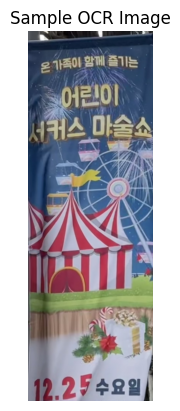

In [ ]:
from PIL import Image
import io
import matplotlib.pyplot as plt

# 1st image as a sample
image_bytes = df_train_parquet.iloc[0]["image"]["bytes"]
sample_image = Image.open(io.BytesIO(image_bytes)).convert("RGB")

# print matplotlib
plt.imshow(sample_image)
plt.axis("off")  # No axis show
plt.title("Sample OCR Image")
plt.show()

#### 1- microsoft/trocr-base-stage1

In [ ]:
# GPU 사용 가능 시 사용
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# image loading
sample_korean_image_path = "/content/drive/MyDrive/Apziva/4th_MonReader/korocr/data/sample_image_01.png"
korean_image = Image.open(sample_korean_image_path).convert("RGB")

# the model was "microsoft/trocr-base-stage1"

# image processing
pixel_values = processor(images=korean_image, return_tensors="pt").pixel_values.to(device)

# Decoder
generated_ids = model.generate(pixel_values)

# Decoding
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print("🧠 TrOCR OCR Output:\n", generated_text)

🧠 TrOCR OCR Output:
 香煙煙煙煙煙


#### 2- ddobokki/ko-trocr

In [ ]:
d_kr_processor = TrOCRProcessor.from_pretrained("ddobokki/ko-trocr")
model2 = VisionEncoderDecoderModel.from_pretrained("ddobokki/ko-trocr")
model2.to("cuda" if torch.cuda.is_available() else "cpu")

# image loading
# 전처리 및 추론
d_kr_pixel_values = d_kr_processor(images=image, return_tensors="pt").pixel_values.to(model.device)
d_kr_generated_ids = model.generate(d_kr_pixel_values)
d_kr_generated_text = processor.batch_decode(d_kr_generated_ids, skip_special_tokens=True)[0]

print("🧠 TrOCR Output:")
print(d_kr_generated_text)

🧠 TrOCR Output:
##으로 김승으로 김승으로 김승으로 김승으로 김승으로


#### 3- Donut-naver

In [ ]:
import torch
from PIL import Image
from transformers import DonutProcessor, VisionEncoderDecoderModel


model_id = "naver-clova-ix/donut-base-finetuned-docvqa"

# Processor & Model Load
donut_processor = DonutProcessor.from_pretrained(model_id)
donut_model = VisionEncoderDecoderModel.from_pretrained(model_id)
donut_model.to("cuda" if torch.cuda.is_available() else "cpu")


# 전처리 및 OCR 실행
donut_pixel_values = donut_processor(image, return_tensors="pt").pixel_values.to(model.device)
decoder_input_ids = donut_processor.tokenizer("<s>", return_tensors="pt").input_ids.to(model.device)

# 추론
outputs = donut_model.generate(
    pixel_values = donut_pixel_values,
    decoder_input_ids = decoder_input_ids,
    max_new_tokens=512
)

# 결과 출력
output_text = donut_processor.tokenizer.decode(outputs[0], skip_special_tokens=True)
print("🧠 Donut OCR Output:\n", output_text)

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.58.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


🧠 Donut OCR Output:
 


#### 4- kakaobrain/khaiii - not a model from HF but Tesserract OCR + Korean Language Pack

##### Package installation

In [ ]:
!sudo apt update

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,050 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,747 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1

In [ ]:
!sudo apt install -y tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.


In [ ]:
!sudo apt install -y tesseract-ocr-kor

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-kor
0 upgraded, 1 newly installed, 0 to remove and 36 not upgraded.
Need to get 1,052 kB of archives.
After this operation, 1,693 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-kor all 1:4.00~git30-7274cfa-1.1 [1,052 kB]
Fetched 1,052 kB in 1s (1,256 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-kor.
(Readin

In [ ]:
!pip install pytesseract

##### Tesseract model

In [ ]:
import pytesseract
from PIL import Image

# image loading
image_path = "/content/drive/MyDrive/Apziva/4th_MonReader/korocr/data/sample_image_01.png"
image = Image.open(image_path).convert("RGB")

text = pytesseract.image_to_string(image, lang="kor")
print("🧠 Tesseract OCR Output:\n", text)

🧠 Tesseract OCR Output:
 5800016 00 10206

 



#### 5- EasyOCR

##### Package Installation

In [ ]:
  !pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 7.2 MB/s eta 0:00:00


##### EasyOCR_model

In [ ]:
import easyocr

reader = easyocr.Reader(['ko'])  # 영어만 쓸 땐 ['en']
result = reader.readtext("/content/drive/MyDrive/Apziva/4th_MonReader/korocr/data/sample_image_01.png", detail=0)
print("🧠 EasyOCR Output:\n", "\n".join(result))

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete🧠 EasyOCR Output:
 -하악명|처 이_: 이악하치.
함께 증기는
어린이
마술소
12.25 수요일
온가죽이 튼
서카스


#### 6 openai-api

##### package installation

In [ ]:
pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.93.0
    Uninstalling openai-1.93.0:
      Successfully uninstalled openai-1.93.0


In [ ]:
!pip install --upgrade openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.91.0
    Uninstalling openai-1.91.0:
      Successfully uninstalled openai-1.91.0


##### OpemAI APi

In [ ]:
from google.colab import userdata
import openai
import base64

api_key = userdata.get('openai_api')
openai.api_key = api_key

In [ ]:
# image loading
sample_korean_image_path = "/content/drive/MyDrive/Apziva/4th_MonReader/korocr/data/sample_image_01.png"

with open(sample_korean_image_path, "rb") as image_file:
    base64_image = base64.b64encode(image_file.read()).decode("utf-8")

# Vision model
response = openai.ChatCompletion.create(
    model="gpt-4o",  # I tried gpt-4-vision-preview, but was deprecated and realized 4o does everything
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Extract all visible text from this image. Return only raw text, no explanation."},
                {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}}
            ]
        }
    ],
    max_tokens=1000,
)

In [ ]:
print("GPT-4o OCR Output:")
print(response["choices"][0]["message"]["content"])

🧠 GPT-4o OCR Output:
Sample OCR Image

온 가족이 함께 즐기는 
어린이 
서커스 마술쇼 
12.25 수요일


### Testing TrOCR-English

After trials and errors, I figured out gpt-4 is the ultimate version. I'll give a try on English dataset as well.

#### Open English tar.gz file

In [ ]:
import os
import tarfile

compressed_file_path = "/content/drive/MyDrive/Apziva/4th_MonReader/IIIT5K-Word_V3.0.tar.gz"
extract_dir = "/content/drive/MyDrive/Apziva/4th_MonReader/"

with tarfile.open(compressed_file_path, "r:gz") as tar:
    tar.extractall(path=extract_dir)

print("압축 해제 완료!")

압축 해제 완료!


#### Testing Enlgish dataset with openai-api

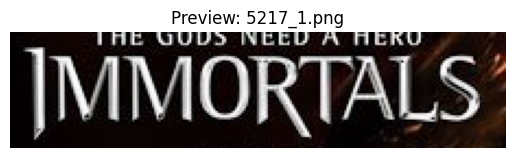

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 경로 설정
sample_english_image_path = "/content/drive/MyDrive/Apziva/4th_MonReader/IIIT5K/test/5217_1.png"

# 이미지 열기
english_sample_image = Image.open(sample_english_image_path)

# 이미지 출력
plt.imshow(english_sample_image)
plt.axis("off")  # 축 숨기기
plt.title("Preview: 5217_1.png")
plt.show()

In [ ]:
# image loading
sample_english_image_path = "/content/drive/MyDrive/Apziva/4th_MonReader/IIIT5K/test/5217_1.png"

with open(sample_english_image_path, "rb") as image_file:
    base64_image = base64.b64encode(image_file.read()).decode("utf-8")

# Vision model
response2 = openai.ChatCompletion.create(
    model="gpt-4o",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Extract all visible text from this image. Return only raw text, no explanation."},
                {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}}
            ]
        }
    ],
    max_tokens=1000,
)


print("GPT-4o OCR Output:")
print(response2["choices"][0]["message"]["content"])

GPT-4o OCR Output:
THE GODS NEED A HERO  
IMMORTALS


I tried many TrOCRs but gpt4, the mllm works. I will try the whole pipeline including text synthesis at the next page.